In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
#data from the Y3 Gold catalog, the objects were classified as galaxies (EXTENDED_CLASS_MOF=3) & -50 < dec < -40
colors = pd.read_csv('source_colors.csv')
colors.head()

,DNF_ZMEAN_MOF,MAG_PSF_G,MAG_PSF_R,MAG_PSF_I,MAG_PSF_Z
0,0.559682,23.424372,22.960579,22.675220,22.707121
1,0.613049,24.238199,22.753164,22.355976,22.186701
2,0.256492,24.271034,22.572611,21.496719,20.945122
3,0.058471,20.467564,20.403315,20.408634,20.230314
4,1.615111,24.693052,24.137976,24.449373,99.000000


/Users/jimenagonzalez/Software/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


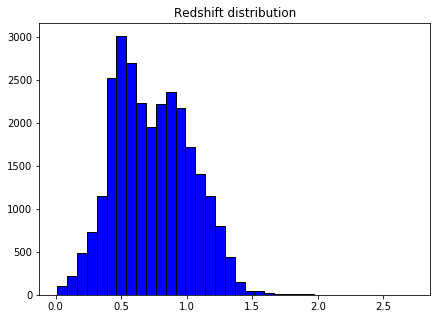

In [3]:
colors = colors[colors['DNF_ZMEAN_MOF'] > 0.01] #When there is no data z<0
colors = colors[colors['MAG_PSF_G'] < 30.] [colors['MAG_PSF_R'] < 30.] [colors['MAG_PSF_I'] < 30.] #decent magnitude
# Redshift distribution
plt.figure(figsize=(7,5))
plt.title('Redshift distribution')
plt.hist(colors['DNF_ZMEAN_MOF'], color = 'blue', edgecolor = 'black', bins = int(180/5))
plt.show()

In [4]:
colors['g_r'] = colors['MAG_PSF_G'] - colors['MAG_PSF_R'] # g-r color
colors['r_i'] = colors['MAG_PSF_R'] - colors['MAG_PSF_I'] # r-i color
colors.head()

,DNF_ZMEAN_MOF,MAG_PSF_G,MAG_PSF_R,MAG_PSF_I,MAG_PSF_Z,g_r,r_i
0,0.559682,23.424372,22.960579,22.675220,22.707121,0.463793,0.285358
1,0.613049,24.238199,22.753164,22.355976,22.186701,1.485035,0.397188
2,0.256492,24.271034,22.572611,21.496719,20.945122,1.698423,1.075892
3,0.058471,20.467564,20.403315,20.408634,20.230314,0.064249,-0.005320
4,1.615111,24.693052,24.137976,24.449373,99.000000,0.555077,-0.311398


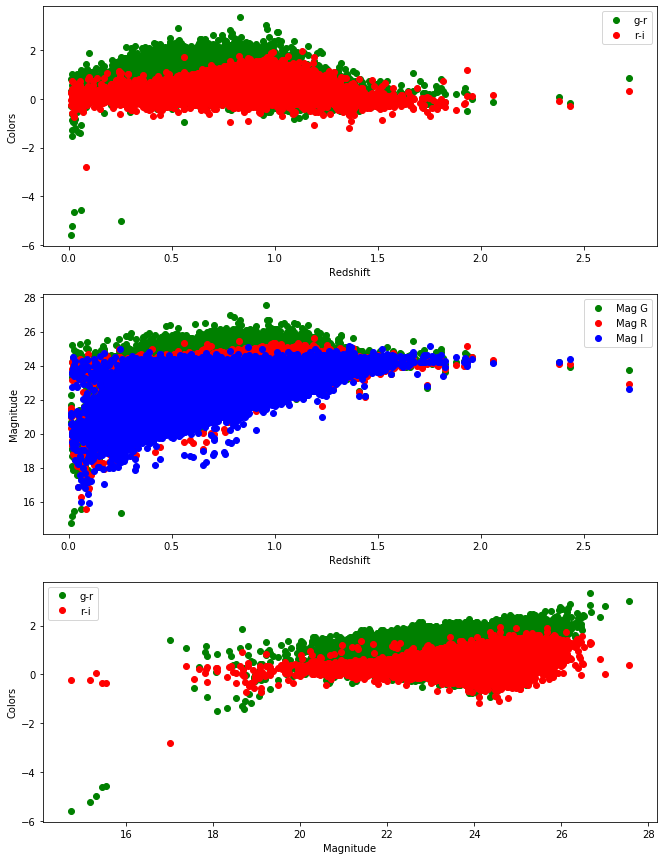

In [5]:
#Plots to see the distributions
plt.figure(figsize=(11,15))

plt.subplot(3, 1, 1)
plt.plot(colors['DNF_ZMEAN_MOF'], colors['g_r'], 'go', label='g-r')
plt.plot(colors['DNF_ZMEAN_MOF'], colors['r_i'], 'ro', label='r-i')
plt.xlabel('Redshift')
plt.ylabel('Colors')
plt.legend()

plt.subplot(3, 1, 2)
plt.plot(colors['DNF_ZMEAN_MOF'], colors['MAG_PSF_G'], 'go', label='Mag G')
plt.plot(colors['DNF_ZMEAN_MOF'], colors['MAG_PSF_R'], 'ro', label='Mag R')
plt.plot(colors['DNF_ZMEAN_MOF'], colors['MAG_PSF_I'], 'bo', label='Mag I')
plt.xlabel('Redshift')
plt.ylabel('Magnitude')
plt.legend()

plt.subplot(3, 1, 3)
plt.plot(colors['MAG_PSF_G'], colors['g_r'], 'go', label='g-r')
plt.plot(colors['MAG_PSF_G'], colors['r_i'], 'ro', label='r-i')
plt.xlabel('Magnitude')
plt.ylabel('Colors')
plt.legend()

plt.show()

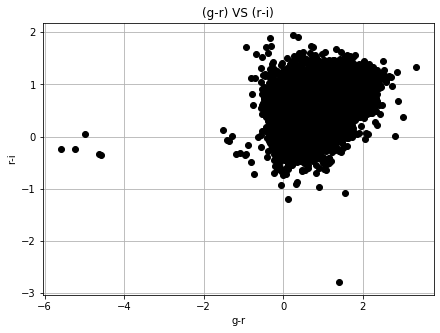

In [6]:
plt.figure(figsize=(7,5))
plt.plot(colors['g_r'], colors['r_i'], 'ko')
plt.title('(g-r) VS (r-i)')
plt.xlabel('g-r')
plt.ylabel('r-i')
plt.grid()
plt.show()

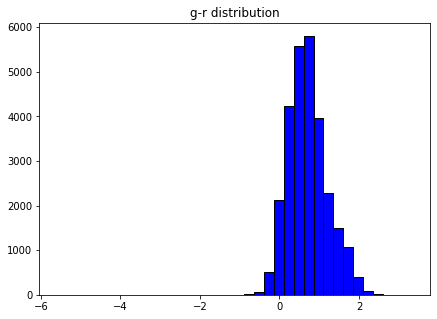

In [7]:
# g-r distribution
plt.figure(figsize=(7,5))
plt.hist(colors['g_r'], color = 'blue', edgecolor = 'black', bins = int(180/5))
plt.title('g-r distribution')
plt.show()

In [8]:
dz = 0.1 # Range of redshift for filtering
dm = 0.2 # Range of magnitude for filtering

def color_distribution(z, m):
    #objects with a redshift between z - dz and z + dz, same idea for magnitude
    fcolors = colors[(colors['DNF_ZMEAN_MOF'] > z - dz)] [(colors['DNF_ZMEAN_MOF'] < z + dz)] 
    fcolors = fcolors[(colors['MAG_PSF_G'] > m - dm)] [(colors['MAG_PSF_G'] < m + dm)]
    random_object = fcolors.sample()
    g_r = random_object['g_r'].values[0]
    r_i = random_object['r_i'].values[0]
    return(g_r, r_i)

In [9]:
# Example
z = 1
m = 24
g_r, r_i = color_distribution(z, m)
print(g_r, r_i)

0.6215286199999994 0.8056907700000018


/Users/jimenagonzalez/Software/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/Users/jimenagonzalez/Software/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys
